In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as mat
import seaborn as sns

In [1]:
import pandas as pd

df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
# drop user id column
df=df.drop('User ID', axis='columns')


In [5]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
# check null values
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_20972\3581220139.py:22: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


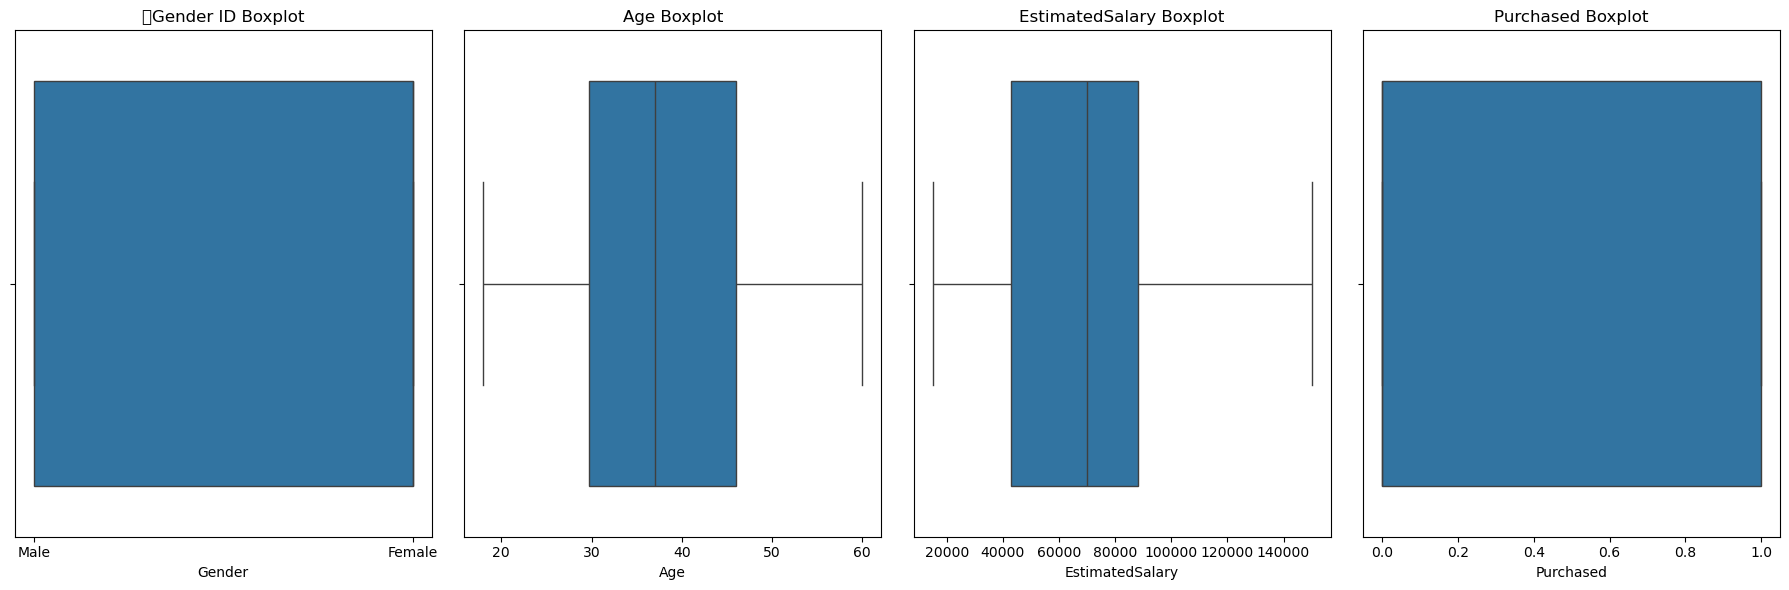

In [7]:
# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))  # make it wider for 3 plots

plt.subplot(1, 4, 1)
sns.boxplot(x=df['Gender'])
plt.title("	Gender ID Boxplot")

plt.subplot(1, 4, 2)
sns.boxplot(x=df['Age'])
plt.title("Age Boxplot")

plt.subplot(1, 4, 3)
sns.boxplot(x=df['EstimatedSalary'])
plt.title("EstimatedSalary Boxplot")

plt.subplot(1, 4, 4)
sns.boxplot(x=df['Purchased'])
plt.title("Purchased Boxplot")

plt.tight_layout()
plt.show()

In [8]:
# encode the gender data using labelencoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


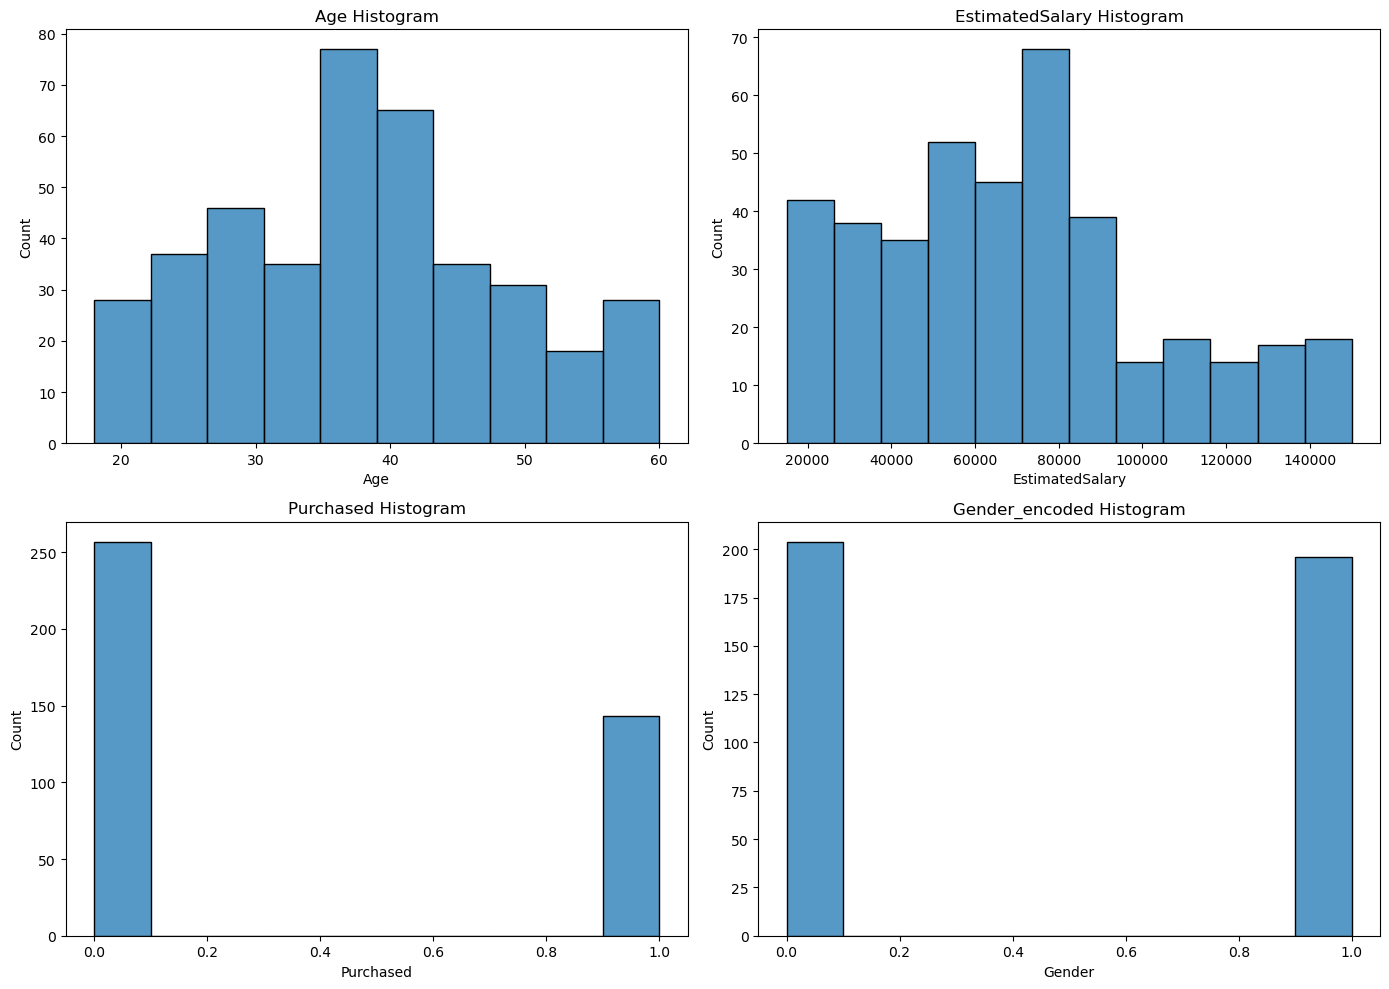

In [9]:
# visualize for checking existing of outlier
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# 1st histogram
plt.subplot(2, 2, 1)
sns.histplot(df['Age'])
plt.title("Age Histogram")

# 2nd histogram
plt.subplot(2, 2, 2)
sns.histplot(df['EstimatedSalary'])
plt.title("EstimatedSalary Histogram")

# 3rd histogram
plt.subplot(2, 2, 3)
sns.histplot(df['Purchased'])
plt.title("Purchased Histogram")

plt.subplot(2, 2, 4)
sns.histplot(df['Gender'])
plt.title("Gender_encoded Histogram")


plt.tight_layout()
plt.show()


In [10]:
# remove skewness from the EstimatedSalary
import numpy as np
df["log_EsSalary"]=np.log(df["EstimatedSalary"])
print("After log transformation of Estimated Salaryt column\n")
df[["EstimatedSalary","log_EsSalary"]]

After log transformation of Estimated Salaryt column



,EstimatedSalary,log_EsSalary
0,19000,9.852194
1,20000,9.903488
2,43000,10.668955
3,57000,10.950807
4,76000,11.238489
...,...,...
395,41000,10.621327
396,23000,10.043249
397,20000,9.903488
398,33000,10.404263


In [11]:
# scalling for normalisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()

col_name = ['log_EsSalary']

features = df_scaled[col_name]
df_scaled[col_name] = scaler.fit_transform(features.values)

df_scaled


,Gender,Age,EstimatedSalary,Purchased,log_EsSalary
0,1,19,19000,0,-2.095414
1,1,35,20000,0,-2.002996
2,0,26,43000,0,-0.623805
3,0,27,57000,0,-0.115976
4,1,19,76000,0,0.402359
...,...,...,...,...,...
395,0,46,41000,1,-0.709619
396,1,51,23000,1,-1.751178
397,0,50,20000,1,-2.002996
398,1,36,33000,0,-1.100718


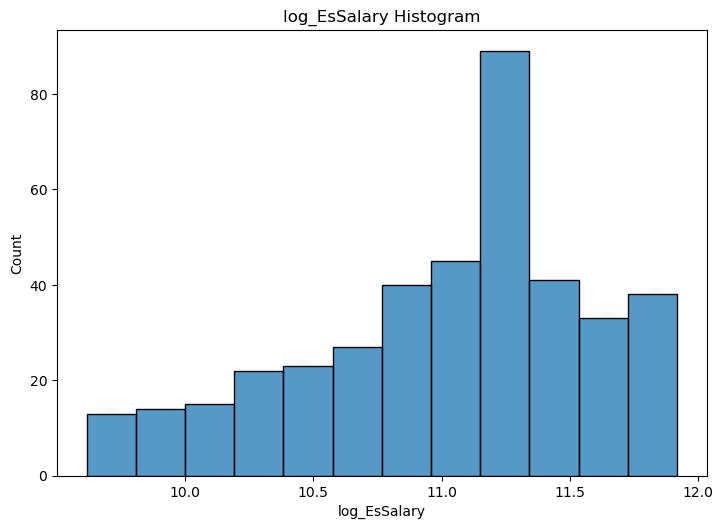

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))


# 2nd histogram
plt.subplot(2, 2, 1)
sns.histplot(df['log_EsSalary'])
plt.title("log_EsSalary Histogram")

plt.tight_layout()
plt.show()


In [14]:
# split dataset
x = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [15]:
# call DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

clf =  DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state = 42)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [16]:

y_pred = clf.predict(X_test)

In [17]:
# calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.8375


In [23]:
cm = confusion_matrix(Y_test, y_pred)


In [24]:
# draw consfusion matrix
cm

array([[46,  6],
       [ 7, 21]])

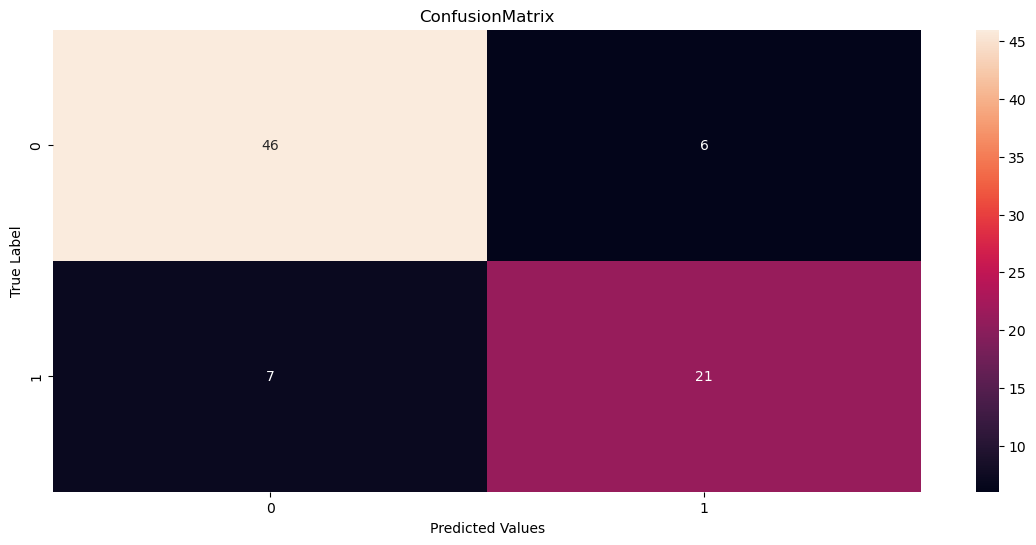

In [19]:
# visualize confusion matrix using heatmap

mat.figure(figsize = (14, 6))
sns.heatmap(cm, annot=True, fmt='d')
mat.title('ConfusionMatrix')
mat.ylabel('True Label')
mat.xlabel('Predicted Values')
mat.show()

In [21]:
clf_rep = classification_report(Y_test, y_pred)
clf_rep

'              precision    recall  f1-score   support\n\n           0       0.87      0.88      0.88        52\n           1       0.78      0.75      0.76        28\n\n    accuracy                           0.84        80\n   macro avg       0.82      0.82      0.82        80\nweighted avg       0.84      0.84      0.84        80\n'

[Text(0.5416666666666666, 0.875, 'x[1] <= 44.5\nentropy = 0.942\nsamples = 320\nvalue = [205, 115]'),
 Text(0.3333333333333333, 0.625, 'x[2] <= 90500.0\nentropy = 0.688\nsamples = 234\nvalue = [191, 43]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 36.5\nentropy = 0.225\nsamples = 193\nvalue = [186.0, 7.0]'),
 Text(0.08333333333333333, 0.125, '\n  (...)  \n'),
 Text(0.25, 0.125, '\n  (...)  \n'),
 Text(0.5, 0.375, 'x[2] <= 133500.0\nentropy = 0.535\nsamples = 41\nvalue = [5, 36]'),
 Text(0.4166666666666667, 0.125, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[2] <= 40500.0\nentropy = 0.641\nsamples = 86\nvalue = [14.0, 72.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.8333333333333334, 0.375, 'x[2] <= 84500.0\nentropy = 0.791\nsamples = 59\nvalue = [14, 45]'),
 Text(0.75, 0.125, '\n  (...)  \n'),
 Text(0.916666666666666

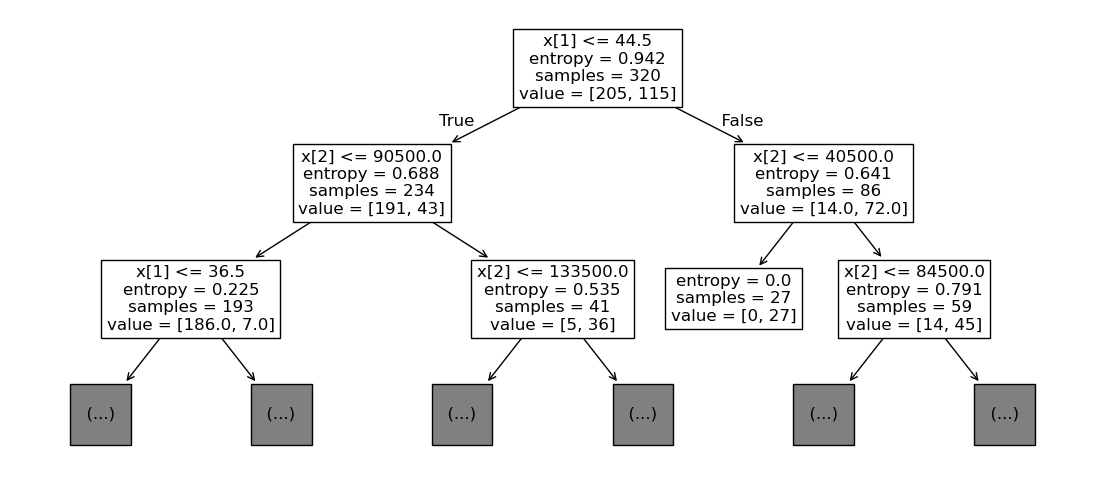

In [22]:
# draw decision tree
from sklearn.tree import plot_tree

mat.figure(figsize = (14, 6))
plot_tree(clf, max_depth = 2, fontsize = 12)